# **Telecom Customer Churn Prediction**

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

In [3]:
df=df.drop(columns=['customerID'])


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isna().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

26

In [8]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

convert the errors in types

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df['TotalCharges']=df['TotalCharges'].fillna(df['Tenure']*df['MonthlyCharges'])

In [12]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [13]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)


In [14]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,1


In [15]:
df = pd.get_dummies(df, drop_first=True)

In [16]:
df.transpose().head(50)

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
Tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
MonthlyCharges,29.85,56.95,53.85,42.3,70.7,99.65,89.1,29.75,104.8,56.15,...,69.5,102.95,78.7,60.65,21.15,84.8,103.2,29.6,74.4,105.65
TotalCharges,29.85,1889.5,108.15,1840.75,151.65,820.5,1949.4,301.9,3046.05,3487.95,...,2625.25,6886.25,1495.1,743.3,1419.4,1990.5,7362.9,346.45,306.6,6844.5
Churn,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
Gender_Male,False,True,True,True,False,False,True,False,False,True,...,True,False,True,False,False,True,False,False,True,True
SeniorCitizen_1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Partner_Yes,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,False
Dependents_Yes,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,True,True,True,False,False
PhoneService_Yes,False,True,True,False,True,True,True,False,True,True,...,True,True,True,False,True,True,True,False,True,True
MultipleLines_Yes,False,False,False,False,False,True,True,False,True,False,...,False,True,False,False,False,True,True,False,True,False


In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [18]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [19]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42, test_size=.2)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
X_train

,Tenure,MonthlyCharges,TotalCharges,Gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Manual
3738,35,49.20,1701.65,True,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,True
3151,15,75.10,1151.55,True,False,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
4860,13,40.55,590.35,True,False,True,True,False,False,False,...,True,False,True,False,False,False,True,False,False,True
3867,26,73.50,1905.70,False,False,True,False,True,False,False,...,True,True,False,True,True,False,True,True,True,False
3810,1,44.55,44.55,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,71,109.25,7707.70,False,False,True,False,True,True,True,...,True,True,True,True,True,False,True,False,False,True
6227,2,46.05,80.35,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4673,25,102.80,2660.20,False,True,False,False,True,True,True,...,True,False,False,True,True,False,False,True,False,True
2710,24,20.40,482.80,False,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(16, activation='relu', input_dim=X_scaled.shape[1]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

2025-07-11 14:43:11.945700: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-11 14:43:11.945892: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-11 14:43:12.103735: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [24]:
history = model.fit(
    X_scaled, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7032 - loss: 0.5833 - val_accuracy: 0.7826 - val_loss: 0.4685
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4526 - val_accuracy: 0.7959 - val_loss: 0.4501
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8068 - loss: 0.4178 - val_accuracy: 0.7897 - val_loss: 0.4459
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4331 - val_accuracy: 0.7799 - val_loss: 0.4451
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4337 - val_accuracy: 0.7862 - val_loss: 0.4455
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8136 - loss: 0.4020 - val_accuracy: 0.7870 - val_loss: 0.4440
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.4094 - val_accuracy: 0.7853 - val_loss: 0.4444
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8111 - loss: 0.4086 - val_accu

In [25]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7712 - loss: 0.4710
Test Accuracy: 0.78


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


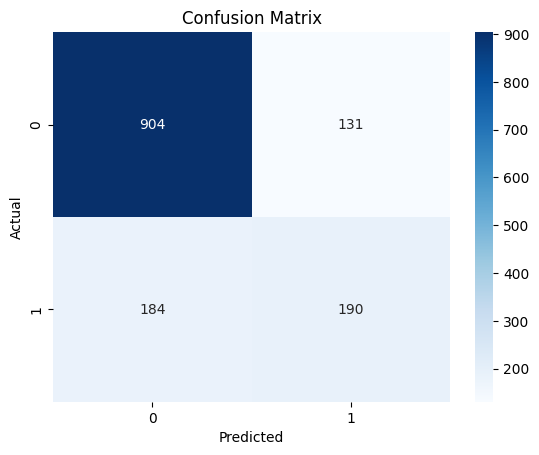

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.59      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# التوقع
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# تقرير التصنيف
print(classification_report(y_test, y_pred))


In [27]:
# select mode
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier()

In [29]:
# train model
rfc.fit(X_scaled,y_train)

RandomForestClassifier()

In [30]:
# predict
y_pred = rfc.predict(X_test_scaled)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


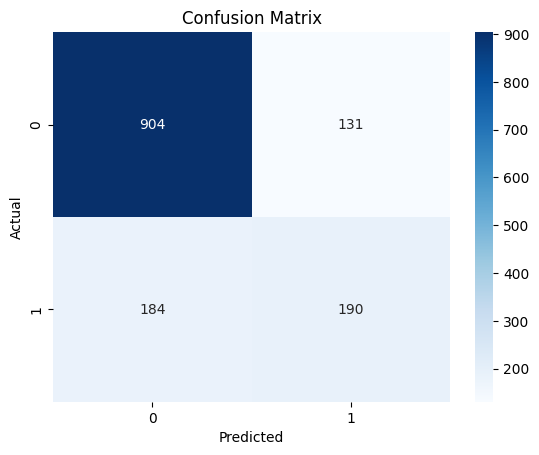

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.59      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# التوقع
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# تقرير التصنيف
print(classification_report(y_test, y_pred))